# Тестирование Louvain алгоритма


Для тестирования алгоритма будем использовать библиотеку для работы с графами **NetworkX** и пакет **python-louvain**,
в котором реализован louvain алгоритм.

Библиотека **NetworkX** присутствует в пакетном менеджере **pip**, поэтому для установки достаточно набрать `pip install networkx`.

Для **python-louvain** аналогично: `pip install python-louvain`, но импортируется данный пакет под названием **community**


import community
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

In [3]:
partition = community.best_partition(G)

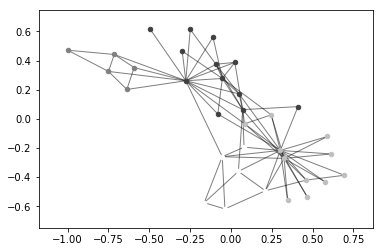

In [4]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [28]:
l = 4
k = 30
Pin = 0.15
Pout = 0.01


In [26]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [ ]:
pl_partition = community.best_partition(E)

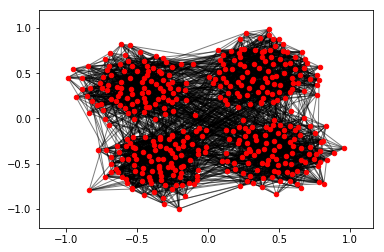

In [29]:
pos1 = nx.spring_layout(E)
nx.draw_networkx_nodes(E, pos1, node_size = 20)
nx.draw_networkx_edges(E,pos1, alpha=0.5)
plt.show()

In [ ]:
size = float(len(set(pl_partition.values())))
pos = nx.spring_layout(E)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()